Before Fine-Tuning: MSE = 209.83735107401952, R2 = 0.9977243496405767
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
After Fine-Tuning: MSE = 212.98905942005723, R2 = 0.9976901698999645


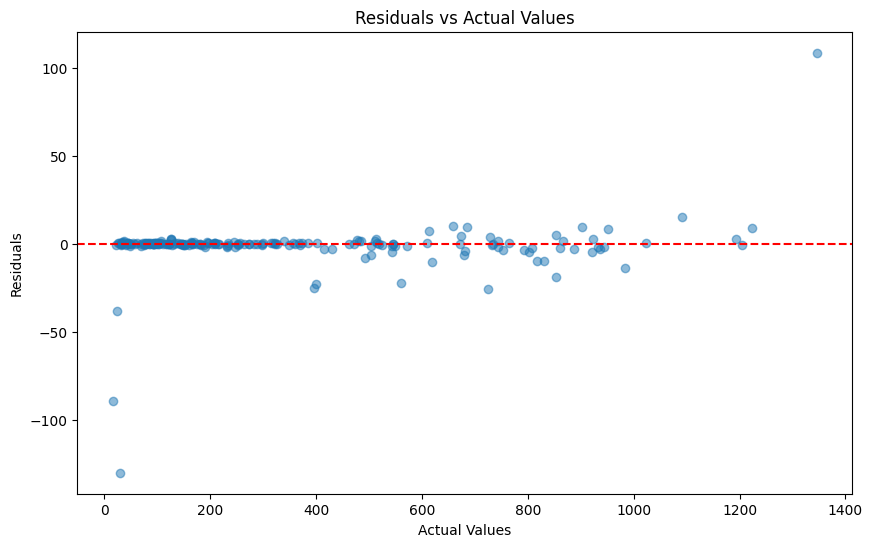

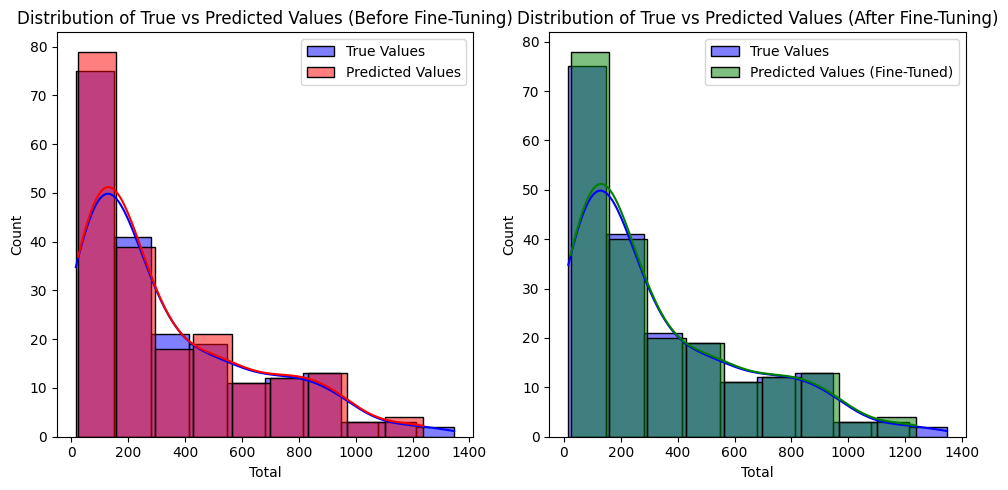

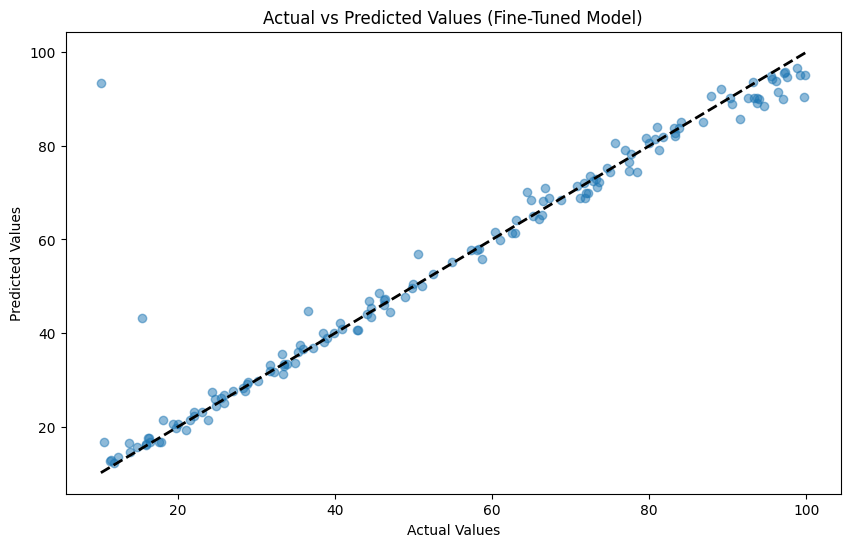

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('/content/supermarket sales.csv')  # Replace with your dataset path

# Data Preprocessing
# Convert categorical variables to numerical
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Create a 'Total' column based on 'Unit price', 'Quantity', and 'Tax 5%'
data['Total'] = data['Unit price'] * data['Quantity'] + data['Tax 5%']

# Define features and target variable
X = data.drop(['Total', 'Invoice ID'], axis=1)  # Drop target and non-feature columns
y = data['Total']

# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation Before Fine-Tuning
mse_before = mean_squared_error(y_test, y_pred)
r2_before = r2_score(y_test, y_pred)

print(f"Before Fine-Tuning: MSE = {mse_before}, R2 = {r2_before}")

# Hyperparameter Tuning with Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Model Evaluation After Fine-Tuning
best_model = grid_search.best_estimator_
y_pred_fine_tuned = best_model.predict(X_test)

mse_after = mean_squared_error(y_test, y_pred_fine_tuned)
r2_after = r2_score(y_test, y_pred_fine_tuned)

print(f"After Fine-Tuning: MSE = {mse_after}, R2 = {r2_after}")

# Residuals vs Actual Performance
residuals = y_test - y_pred_fine_tuned

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

# Data Visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(y_test, color='blue', label='True Values', kde=True)
sns.histplot(y_pred, color='red', label='Predicted Values', kde=True)
plt.title('Distribution of True vs Predicted Values (Before Fine-Tuning)')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(y_test, color='blue', label='True Values', kde=True)
sns.histplot(y_pred_fine_tuned, color='green', label='Predicted Values (Fine-Tuned)', kde=True)
plt.title('Distribution of True vs Predicted Values (After Fine-Tuning)')
plt.legend()

plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred_tuned, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Fine-Tuned Model)')
plt.show()